In [827]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score


In [828]:
# Loading the data from CSV file to a Pandas DataFrame
parkinsons_data = pd.read_csv ("/content/ParkinsonsDisease.csv")


In [829]:
# Exploring Dataset Content
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [830]:
# Dropping The Redundant Name Column
parkinsons_data.drop(['name'], axis=1, inplace=True)

In [831]:
# Exploring Information About Dataframe
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [832]:


 parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [833]:
print('Number of Duplicated Rows :',parkinsons_data.duplicated().sum())

Number of Duplicated Rows : 0


In [834]:
parkinsons_data.isnull().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


<Axes: xlabel='status', ylabel='count'>

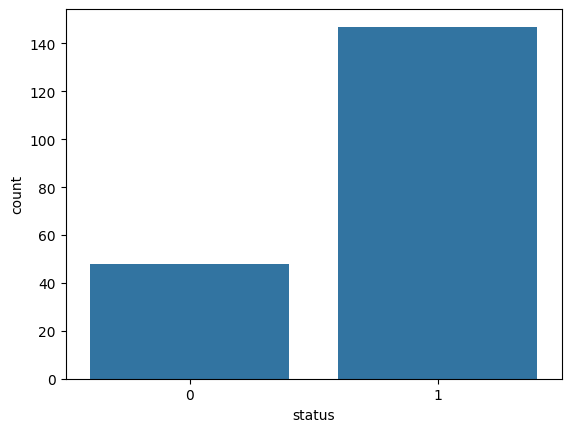

In [835]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.countplot(x='status',data=parkinsons_data)

<Axes: >

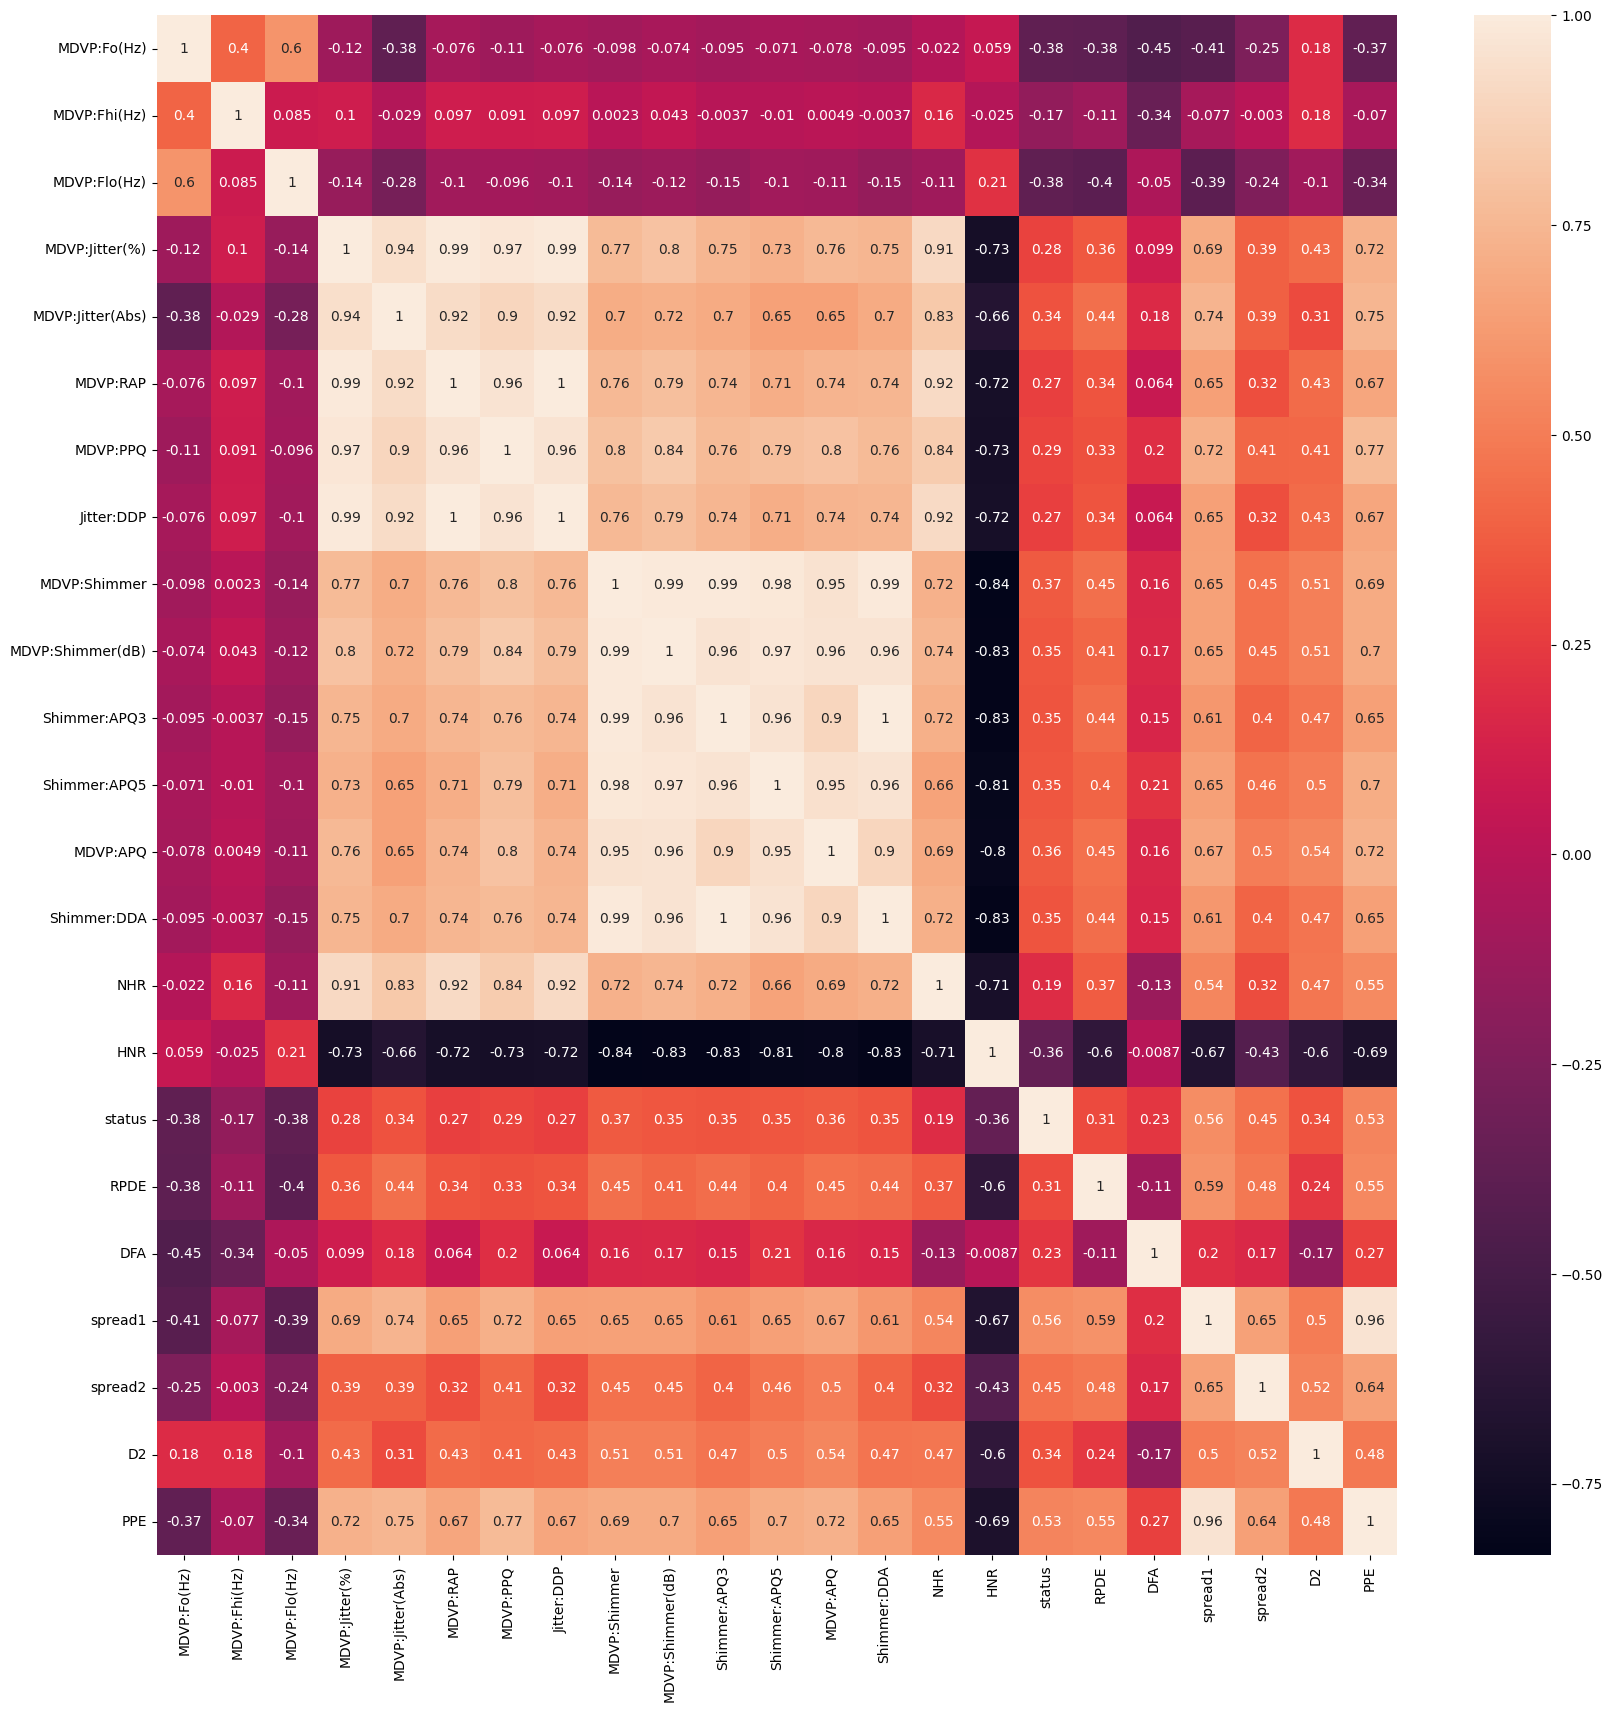

In [836]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(parkinsons_data.corr(),annot=True,ax=ax)

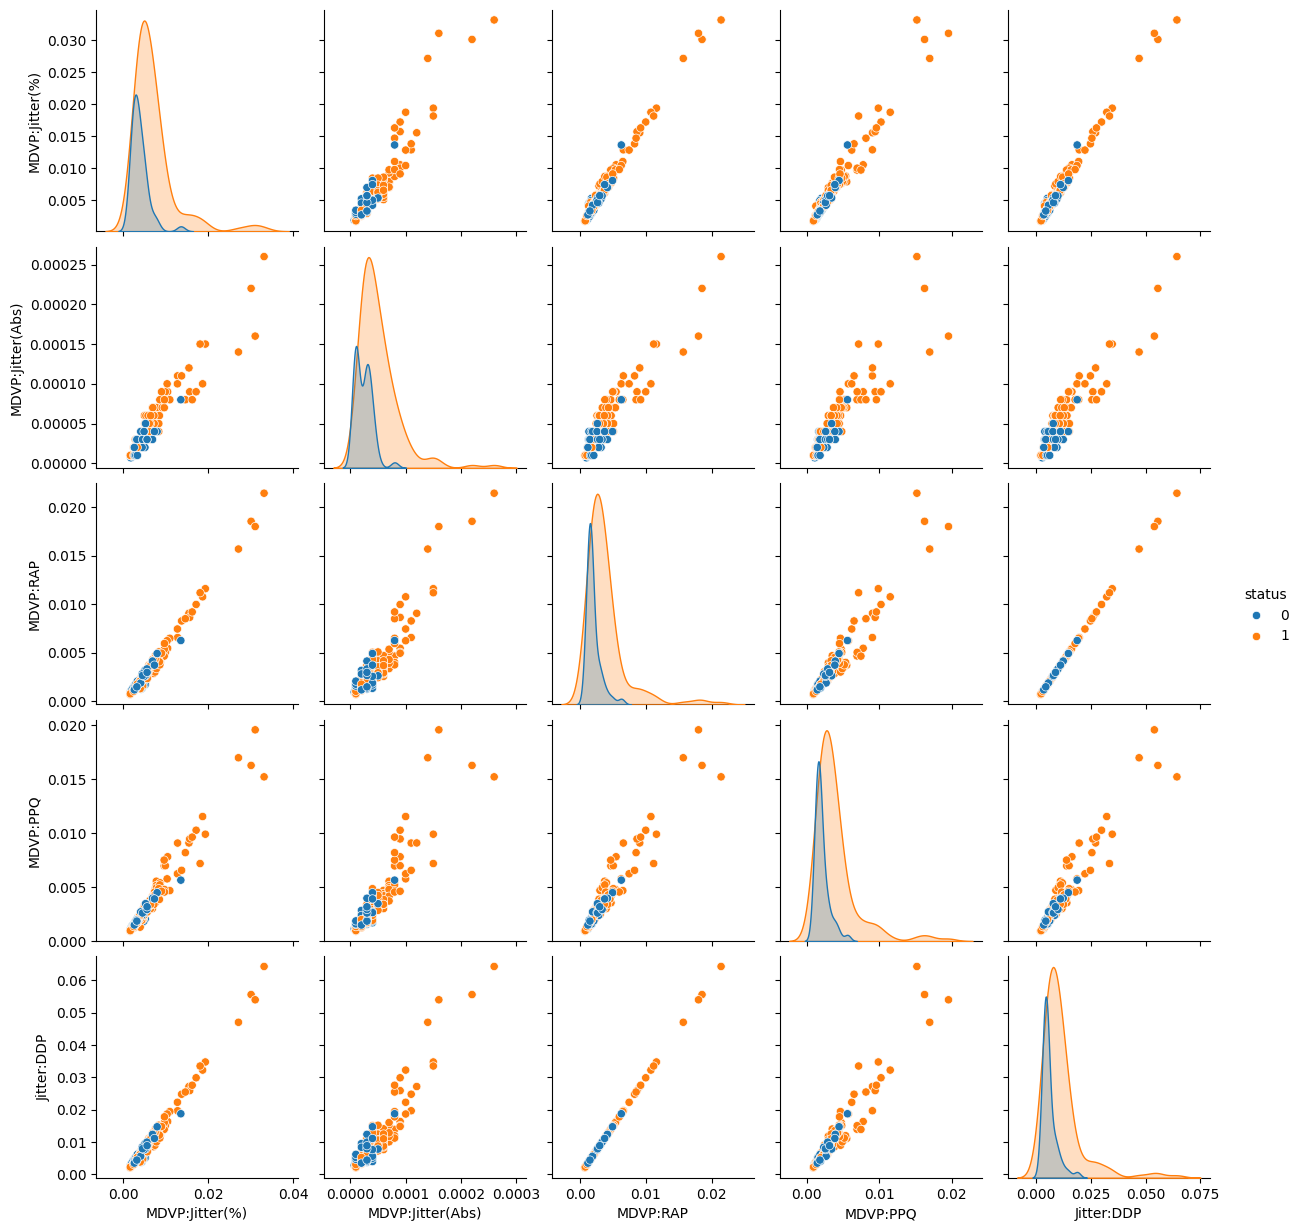

In [837]:
sns.pairplot(parkinsons_data,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()


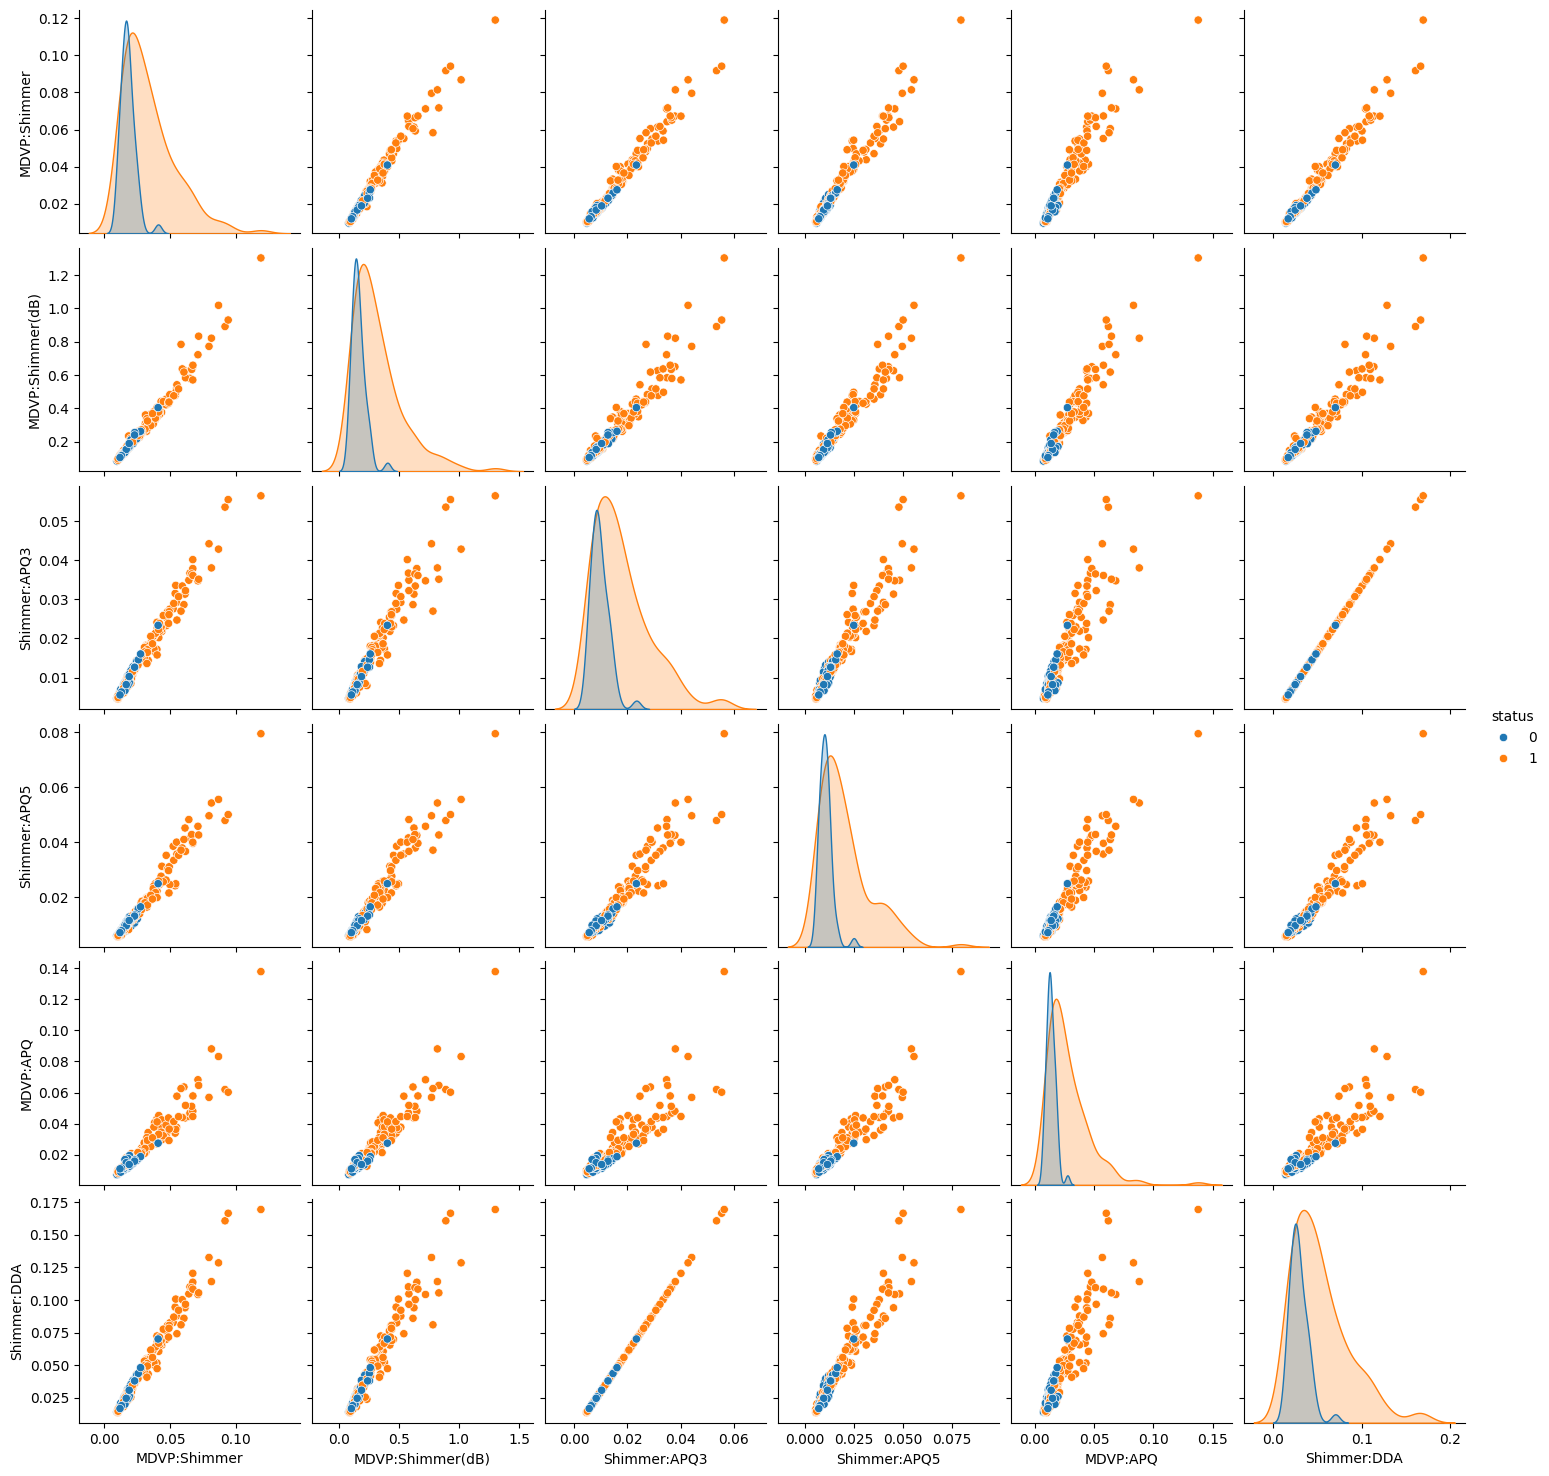

In [838]:
sns.pairplot(parkinsons_data,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

In [839]:
# Exploring Imabalance In Dataset
parkinsons_data['status'].value_counts()


,count
status,
1,147
0,48


In [840]:
# Extracting Features Into Features & Target
X = parkinsons_data.drop(['status'], axis=1)
Y = parkinsons_data['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (Y) Shape Before Balancing :', Y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (Y) Shape Before Balancing : (195,)


In [841]:
from imblearn.over_sampling import SMOTE


# Intialising SMOTE Object
sm = SMOTE(random_state=300)
# Resampling Data
X, Y = sm.fit_resample(X, Y)


print('Feature (X) Shape After Balancing :', X.shape)
print('Target (Y) Shape After Balancing :', Y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (Y) Shape After Balancing : (294,)


In [842]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state=250)

In [843]:
# Visualising the Original/Train/Test sizes
print ( X.shape,X_train.shape,X_test.shape)


(294, 22) (235, 22) (59, 22)


In [844]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [845]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [846]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without parkinsons', 'with parkinsons']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr.score(X_train,Y_train)*100,lr.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[22  0]
 [ 8 29]]
Accuracy by confusion matrix: 0.864406779661017


                    precision    recall  f1-score   support

without parkinsons       0.73      1.00      0.85        22
   with parkinsons       1.00      0.78      0.88        37

          accuracy                           0.86        59
         macro avg       0.87      0.89      0.86        59
      weighted avg       0.90      0.86      0.87        59

----------------------------------------------------------------------


(84.68085106382979, 86.4406779661017)

In [847]:


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without parkinsons', 'with parkinsons']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
gnb.score(X_train,Y_train)*100,gnb.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[19  3]
 [13 24]]
Accuracy by confusion matrix: 0.7288135593220338


                    precision    recall  f1-score   support

without parkinsons       0.59      0.86      0.70        22
   with parkinsons       0.89      0.65      0.75        37

          accuracy                           0.73        59
         macro avg       0.74      0.76      0.73        59
      weighted avg       0.78      0.73      0.73        59

----------------------------------------------------------------------


(78.29787234042553, 72.88135593220339)

In [848]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without parkinsons', 'with parkinsons']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt.score(X_train,Y_train)*100,dt.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[22  0]
 [ 6 31]]
Accuracy by confusion matrix: 0.8983050847457628


                    precision    recall  f1-score   support

without parkinsons       0.79      1.00      0.88        22
   with parkinsons       1.00      0.84      0.91        37

          accuracy                           0.90        59
         macro avg       0.89      0.92      0.90        59
      weighted avg       0.92      0.90      0.90        59

----------------------------------------------------------------------


(99.57446808510639, 89.83050847457628)

In [849]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without parkinsons', 'with parkinsons']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
svm.score(X_train,Y_train)*100,svm.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[22  0]
 [ 8 29]]
Accuracy by confusion matrix: 0.864406779661017


                    precision    recall  f1-score   support

without parkinsons       0.73      1.00      0.85        22
   with parkinsons       1.00      0.78      0.88        37

          accuracy                           0.86        59
         macro avg       0.87      0.89      0.86        59
      weighted avg       0.90      0.86      0.87        59

----------------------------------------------------------------------


(89.36170212765957, 86.4406779661017)

In [850]:
#Building a predictive system
#Data of a parkinson's Disease patient
input_data = (116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have parkinsons')
else:
  print('The person have parkinsons')

[[-0.98787329 -0.82306912 -0.268027    1.27046698  1.81330669  1.09495079
   2.10666129  1.09617789  1.70458916  1.49755374  1.69273825  2.25926746
   1.07940198  1.69235084 -0.18226746 -0.58705639 -0.46602882  2.07906219
   1.51084686  1.28145095  0.10008774  1.80512462]]
[1]
The person have parkinsons


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [851]:
import pickle
# Save the trained SVM model with pickle
pickle.dump(svm, open('parkinsons.pkl', 'wb'))